在简单的一维随机游走的例子中，只需要设置1个概率值，这是因为模型规定每次只能向左或向右走给定的距离。  
如果一个系统可以在$N$种状态之间相互演化，就需要设置$N^2$个概率值，以只有3种状态的系统为例，需要设置的概率值有  
$$\left[ 
    {\begin{array}{cc}
    q_{11} & q_{12} & q_{13} \\
    q_{21} & q_{22} & q_{23} \\
    q_{31} & q_{32} & q_{33} \\
    \end{array} }
\right]$$  
下标表示从一种状态演化到另一种状态或者保持不变，这个矩阵称为转移概率矩阵。  
如果演化前体系处于3种状态的概率分别为$p_1,p_2,p_3$，那么一次演化后的概率$p'_1,p'_2,p'_3$为  
$$\left\{
    {\begin{array}{cc}
    p'_1 = p_1\times q_{11}+p_2\times q_{21}+p_3\times q_{31} \\
    p'_2 = p_1\times q_{12}+p_2\times q_{22}+p_3\times q_{32} \\
    p'_3 = p_1\times q_{13}+p_2\times q_{23}+p_3\times q_{33} \\
    \end{array} }
\right.$$  
用矩阵表示就是  
$$\left[ 
    {\begin{array}{cc}
    p_1 & p_2 & p_3 \\
    \end{array} }
\right]
\left[ 
    {\begin{array}{cc}
    q_{11} & q_{12} & q_{13} \\
    q_{21} & q_{22} & q_{23} \\
    q_{31} & q_{32} & q_{33} \\
    \end{array} }
\right]
=
\left[ 
    {\begin{array}{cc}
    p'_1 & p'_2 & p'_3 \\
    \end{array} }
\right]
$$  
简记为$\boldsymbol{P(n)}\boldsymbol{Q}=\boldsymbol{P(n+1)}$  
当系统演化一定的步数后，$\boldsymbol{P(n)}=\boldsymbol{P(0)}\boldsymbol{Q^n}$  
根据转移概率矩阵的性质，当$n$足够大时，$\boldsymbol{Q^n}$会收敛到以下形式  
$$\boldsymbol{Q^n}\rightarrow
\left[ 
    {\begin{array}{cc}
    \pi_1 & \pi_2 & \pi_3 \\
    \pi_1 & \pi_2 & \pi_3 \\
    \pi_1 & \pi_2 & \pi_3 \\
    \end{array} }
\right]
$$  
因此，不论初始分布$\boldsymbol{P(0)}$如何，最终分布都是$\boldsymbol{P(n)}=\boldsymbol{\pi}=(\pi_1,\pi_2,\pi_3)$，最终的分布可以由转移概率矩阵确定。  
下面任意取一组转移概率来验证这一结论

In [1]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

# 设置转移概率矩阵
Q = np.array(
    (
        (0.5, 0.25, 0.25), 
        (0.8, 0.1, 0.1), 
        (0.3, 0.4, 0.3),
    )
)

# 设置一个初始分布
pi = np.array((1.0, 0.0, 0.0))

# 设置演化步数
N_steps = 20

for _ in range(N_steps):
    pi = pi.dot(Q)

print(f"N_steps: {N_steps}")
print(pi)
print(f"N_steps: {N_steps + 1}")
print(pi.dot(Q))

N_steps: 20
[0.52914798 0.24663677 0.22421525]
N_steps: 21
[0.52914798 0.24663677 0.22421525]


可以看到演化一定步数后，系统在各状态的分布不再变化

In [2]:
Qn = np.array(Q)

for _ in range(N_steps):
    Qn = Qn.dot(Q)
print(Qn)

[[0.52914798 0.24663677 0.22421525]
 [0.52914798 0.24663677 0.22421525]
 [0.52914798 0.24663677 0.22421525]]


最终分布和$\boldsymbol{Q^n}$的每一行一样

换一个转移概率矩阵

In [3]:
Q = np.array(
    (
        (0.2, 0.4, 0.4),
        (0.6, 0.2, 0.2), 
        (0.1, 0.3, 0.6),
    )
)
pi = np.array((1.0, 0.0, 0.0))
N_steps = 20
for _ in range(N_steps):
    pi = pi.dot(Q)
print(f"N_steps: {N_steps}")
print(pi)
print(f"N_steps: {N_steps + 1}")
print(pi.dot(Q))

N_steps: 20
[0.27659574 0.29787234 0.42553191]
N_steps: 21
[0.27659574 0.29787234 0.42553191]


换一个初始分布

In [4]:
pi = np.array((0.5, 0.5, 0.0))
N_steps = 20
for _ in range(N_steps):
    pi = pi.dot(Q)
print(f"N_steps: {N_steps}")
print(pi)
print(f"N_steps: {N_steps + 1}")
print(pi.dot(Q))

N_steps: 20
[0.27659574 0.29787234 0.42553191]
N_steps: 21
[0.27659574 0.29787234 0.42553191]


In [5]:
Qn = np.array(Q)

for _ in range(N_steps):
    Qn = Qn.dot(Q)
print(Qn)

[[0.27659574 0.29787234 0.42553191]
 [0.27659574 0.29787234 0.42553191]
 [0.27659574 0.29787234 0.42553191]]


可见最终的分布只和转移概率矩阵有关。  
把以上结论应用到随机游走中，只要构造合适的转移概率矩阵，就可以让随机游走的结果服从特定的分布。  
但是如果转移概率矩阵很大，计算起来就非常困难，此时可以在形式上定义完整的转移概率矩阵，只计算需要用到的部分。  
要想让随机游走在特定分布上保持平衡，只需要让此分布下任意两状态相互转化的概率相等即可，即
$$f(x)w(x\rightarrow x')=f(x')w(x'\rightarrow x)$$  
这个条件称为细致平衡条件，在Metropolis方法中一般构造以下形式的过渡概率  
$$w(x\rightarrow x')=\min{\left[1,\frac{f(x')}{f(x)}\right]}$$
使用Metropolis方法对随机数进行抽样的流程如下：  
假设游走到达了位置$x$，选取一个试探位置$x'$  
计算$r=\frac{f(x')}{f(x)}$，如果大于1，则$w(x\rightarrow x')=1$，接受这一步试探  
否则$w(x\rightarrow x')=r$，产生一个随机数$\xi$，如果$\xi\leq r$，接受这一步试探  
否则拒绝这一步试探，停在原地，进行下一步试探  
因为Metropolis方法中计算的是密度函数的比值，所以不用考虑归一化系数，因此可以用来对难以归一化的密度函数进行采样。  
上述流程没有考虑抽样区域的边界，如果抽样的区域有边界就需要做特殊处理。  

用Metropolis方法对自由度为4的$\chi^2$分布进行抽样。  
$$f(x)=\frac{1}{2^{n/2}\Gamma(n/2)}x^{n/2-1}e^{-x/2},x>0,n=4$$
在Metropolis方法中计算的是  
$$\frac{f(x')}{f(x)}=\frac{x'}{x}\exp{\left(\frac{x-x'}{2}\right)}$$
如果不考虑边界附近的情况  

In [6]:
rng = default_rng()

def r_fx_fy(x, y):
    return x/y*np.exp((y-x)/2)

# 总步数
N = 100000
# 每一步的步长范围
delta = 7

# 起点
x0 = 1e-5
walk_path = [x0]
for _ in range(N):
    # 取一个试探位置
    x_try = rng.uniform(x0-delta, x0+delta)
    # 如果试探位置不在定义域内，则拒绝
    if x_try <= 0:
        continue
    # 计算r，判断是否接受
    r = r_fx_fy(x_try, x0)
    if r > 1:
        x0 = x_try
        walk_path.append(x0)
        continue
    if r >= rng.random():
        x0 = x_try
        walk_path.append(x0)
        continue
    walk_path.append(x0)


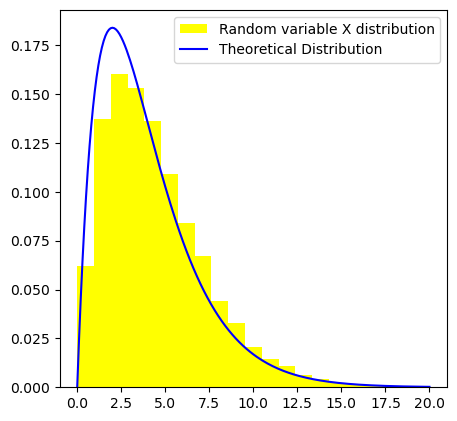

In [7]:
# 理论密度曲线
def chi2_2(x):
    return x/4*np.exp(-x/2)

x = np.linspace(0, 20, 201)
y = chi2_2(x)

plt.figure(figsize=(5, 5), dpi=100)
plt.hist(walk_path, bins=21, range=(0.0, 20.0), density=True, color='yellow', label='Random variable X distribution')
plt.plot(x, y, color='blue', label='Theoretical Distribution')
plt.legend(loc='upper right')
plt.show()

可以看到边界附近的偏差较大。

对于单边有界的情况，可以做对称处理，从而允许游走进入定义域外的区域  

In [8]:
def r_fx_fy(x, y):
    x = abs(x)
    y = abs(y)
    return x/y*np.exp((y-x)/2)

# 总步数
N = 100000
# 每一步的步长范围
delta = 15

# 起点
x0 = 1e-5
walk_path = [x0]

# 用于记录步数
n_accept = 0

for _ in range(N):
    # 取一个试探位置
    x_try = rng.uniform(x0-delta, x0+delta)
    # 计算r，判断是否接受
    r = r_fx_fy(x_try, x0)
    if r > 1:
        n_accept += 1
        x0 = x_try
        walk_path.append(abs(x0))
        continue
    if r >= rng.random():
        n_accept += 1
        x0 = x_try
        walk_path.append(abs(x0))
        continue
    walk_path.append(abs(x0))

print(f"n_accept/N={n_accept/N:.4}")

n_accept/N=0.4542


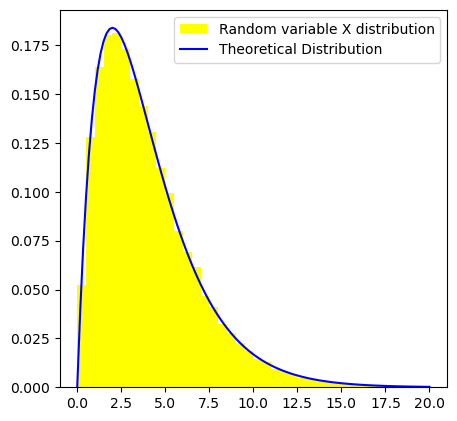

In [9]:
x = np.linspace(0, 20, 121)
y = chi2_2(x)

plt.figure(figsize=(5, 5), dpi=100)
plt.hist(walk_path, bins=40, range=(0.0, 20.0), density=True, color='yellow', label='Random variable X distribution')
plt.plot(x, y, color='blue', label='Theoretical Distribution')
plt.legend(loc='upper right')
plt.show()

对于双边有界的情况可以设置周期性边界条件，将定义域外的试探平移到定义域内  
用Metropolis方法对以下分布进行抽样  
$$f(x)=A x^2 e^{-x},x\in[0,4]$$

In [10]:
def r_fx_fy(x, y):
    return x*x/y/y*np.exp(y-x)

# 用于将试探点移动到定义域内
def bc(x, b1, b2):
    length = b2 - b1
    if x < b1:
        return bc(x+length, b1, b2)
    if x > b2:
        return bc(x-length, b1, b2)
    return x

# 总步数
N = 100000
# 每一步的步长范围
delta = 1

# 起点
x0 = 1e-5
walk_path = [x0]

# 用于记录步数
n_accept = 0

for _ in range(N):
    # 取一个试探位置
    x_try = rng.uniform(x0-delta, x0+delta)
    x_try = bc(x_try, 0, 4)
    # 计算r，如果大于1，则接受
    r = r_fx_fy(x_try, x0)
    if r > 1:
        n_accept += 1
        x0 = x_try
        walk_path.append(x0)
        continue
    if r >= rng.random():
        n_accept += 1
        x0 = x_try
        walk_path.append(x0)
        continue
    walk_path.append(x0)

print(f"n_accept/N={n_accept/N:.4}")

n_accept/N=0.8553


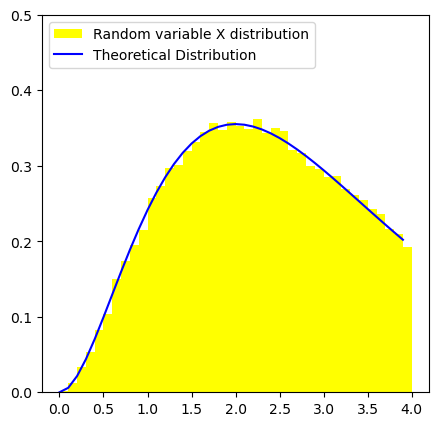

In [11]:
def fx(x):
    return x*x*np.exp(-x)/1.5238

x = np.arange(0, 4 ,0.1)
y = fx(x)

plt.figure(figsize=(5, 5), dpi=100)
plt.hist(walk_path, bins=40, range=(0.0, 4.0), density=True, color='yellow', label='Random variable X distribution')
plt.plot(x, y, color='blue', label='Theoretical Distribution')
plt.legend(loc='upper left')
plt.ylim((0, 0.5))
plt.show()